In [3]:
import pandas as pd 
import numpy as np
from numpy import percentile
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from datetime import datetime

%matplotlib inline
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', 50)
pd.set_option('display.float_format', None)

In [50]:
df = pd.read_csv(r'C:\Users\kshiti.sinha\Desktop\projects\prof\bank_transactions.csv\bank_transactions.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048567 entries, 0 to 1048566
Data columns (total 9 columns):
 #   Column                   Non-Null Count    Dtype  
---  ------                   --------------    -----  
 0   TransactionID            1048567 non-null  object 
 1   CustomerID               1048567 non-null  object 
 2   CustomerDOB              1045170 non-null  object 
 3   CustGender               1047467 non-null  object 
 4   CustLocation             1048416 non-null  object 
 5   CustAccountBalance       1046198 non-null  float64
 6   TransactionDate          1048567 non-null  object 
 7   TransactionTime          1048567 non-null  int64  
 8   TransactionAmount (INR)  1048567 non-null  float64
dtypes: float64(2), int64(1), object(6)
memory usage: 72.0+ MB


In [ ]:
#Data Exploration and Cleaning

In [5]:
df.describe()

,CustAccountBalance,TransactionTime,TransactionAmount (INR)
count,1.046198e+06,1.048567e+06,1.048567e+06
mean,1.154035e+05,1.570875e+05,1.574335e+03
std,8.464854e+05,5.126185e+04,6.574743e+03
min,0.000000e+00,0.000000e+00,0.000000e+00
25%,4.721760e+03,1.240300e+05,1.610000e+02
50%,1.679218e+04,1.642260e+05,4.590300e+02
75%,5.765736e+04,2.000100e+05,1.200000e+03
max,1.150355e+08,2.359590e+05,1.560035e+06


In [6]:
df.head()

,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR)
0,T1,C5841053,10/1/94,F,JAMSHEDPUR,17819.05,2/8/16,143207,25.0
1,T2,C2142763,4/4/57,M,JHAJJAR,2270.69,2/8/16,141858,27999.0
2,T3,C4417068,26/11/96,F,MUMBAI,17874.44,2/8/16,142712,459.0
3,T4,C5342380,14/9/73,F,MUMBAI,866503.21,2/8/16,142714,2060.0
4,T5,C9031234,24/3/88,F,NAVI MUMBAI,6714.43,2/8/16,181156,1762.5


In [7]:
df.drop(['TransactionID', 'CustomerID', 'TransactionTime'], axis=1, inplace=True)

In [8]:
#convert customer DOB to datetime

df['CustomerDOB'] = pd.to_datetime(df['CustomerDOB'], dayfirst=True)
df['CustomerDOB'] = df['CustomerDOB'].apply(lambda x : x.strftime("%d-%m-%Y") if not pd.isna(x) else np.nan)
print(df['CustomerDOB'])

0          10-01-1994
1          04-04-2057
2          26-11-1996
3          14-09-1973
4          24-03-1988
              ...    
1048562    08-04-1990
1048563    20-02-1992
1048564    18-05-1989
1048565    30-08-1978
1048566    05-03-1984
Name: CustomerDOB, Length: 1048567, dtype: object


In [9]:
#converting transactiondate to datetime

df['TransactionDate'] = pd.to_datetime(df['TransactionDate'], dayfirst=True)

In [10]:
#finding the number of missing values in the dataset

df.isnull().sum()

CustomerDOB                3397
CustGender                 1100
CustLocation                151
CustAccountBalance         2369
TransactionDate               0
TransactionAmount (INR)       0
dtype: int64

In [11]:
df['CustomerDOB'].value_counts()

01-01-1800    57339
01-01-1989      809
01-01-1990      784
06-08-1991      699
01-01-1991      666
              ...  
03-09-2060        1
17-11-2052        1
11-09-2063        1
28-02-2047        1
24-10-2044        1
Name: CustomerDOB, Length: 17254, dtype: int64

In [12]:
df['CustAccountBalance'].value_counts()

0.00        2711
45856.24     538
27021.05     514
10238.63     401
0.01         300
            ... 
24755.11       1
389.50         1
23917.66       1
51442.90       1
1002.96        1
Name: CustAccountBalance, Length: 161328, dtype: int64

In [13]:
df['TransactionDate'].value_counts()

2016-08-07    27261
2016-08-13    26921
2016-08-06    26585
2016-09-04    26564
2016-09-03    26431
2016-09-10    25761
2016-08-14    25596
2016-09-11    25454
2016-08-15    24171
2016-08-21    22986
2016-09-02    22839
2016-08-12    22438
2016-09-01    22327
2016-08-11    21833
2016-08-09    21823
2016-09-08    21765
2016-08-10    21649
2016-09-09    21568
2016-08-27    21469
2016-08-20    21339
2016-09-05    21221
2016-09-07    21161
2016-08-17    21121
2016-08-05    21112
2016-08-28    21054
2016-08-08    21042
2016-08-02    20948
2016-09-12    20753
2016-08-04    20682
2016-08-03    20615
2016-09-13    20601
2016-08-01    20438
2016-08-16    20414
2016-09-14    19969
2016-09-15    19754
2016-08-31    19711
2016-09-06    19640
2016-08-18    19453
2016-08-19    18714
2016-08-22    18558
2016-08-25    18546
2016-08-24    18026
2016-08-26    17742
2016-08-30    17430
2016-08-23    17374
2016-08-29    16882
2016-09-18    14689
2016-09-26    12460
2016-09-25     8164
2016-09-27     7447


In [14]:
df.duplicated().sum()

43898

In [15]:
# remove duplicated rows 
df.drop_duplicates(inplace=True)

In [16]:
#Observations on Data :
#CustomerDOB, CustGender, CustLocation and CustAccountBalance have a high number of missing values
# Unrealistic date '01/01/1800' and '12/06/2067'


In [21]:
# check missing values on CustGender
df[df['CustGender'].isna()]

,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionAmount (INR)
176,01-01-1800,NaN,NAVI MUMBAI,8512.28,2016-08-12,3449.00
2124,01-01-1800,NaN,BANGALORE,7115.05,2016-10-21,584.06
5061,01-01-1800,NaN,MUMBAI,10669.85,2016-09-22,1500.00
13035,01-01-1800,NaN,MULUND WEST,65989.63,2016-09-26,336.52
14878,01-01-1800,NaN,NAVI MUMBAI,603.00,2016-09-26,1494.00
...,...,...,...,...,...,...
1034579,12-12-2050,NaN,MUMBAI,1091.50,2016-09-18,1168.00
1038102,01-01-1800,NaN,MUMBAI,6516.33,2016-09-18,100.00
1040773,01-01-1800,NaN,MUMBAI,25.00,2016-09-18,100.00
1044782,01-01-1800,NaN,JAIPUR,2222.22,2016-09-18,8335.00


In [18]:
#It can be observed that wherever Customer Gender is missing, Customer DOB is also missing.

In [51]:
#to verify it further we use filters to check
df[(df['CustGender'].isna()) & (df['CustomerDOB'] == '1/1/1800')]

,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR)
176,T177,C5698953,1/1/1800,NaN,NAVI MUMBAI,8512.28,12/8/16,155727,3449.00
2124,T2125,C4525944,1/1/1800,NaN,BANGALORE,7115.05,21/10/16,201052,584.06
5061,T5062,C7541851,1/1/1800,NaN,MUMBAI,10669.85,22/9/16,61227,1500.00
13035,T13036,C3788162,1/1/1800,NaN,MULUND WEST,65989.63,26/9/16,210819,336.52
14878,T14879,C6239153,1/1/1800,NaN,NAVI MUMBAI,603.00,26/9/16,163122,1494.00
...,...,...,...,...,...,...,...,...,...
1034816,T1034817,C8437074,1/1/1800,NaN,NAVI MUMBAI,1294.44,18/9/16,174142,392.67
1038102,T1038103,C1320574,1/1/1800,NaN,MUMBAI,6516.33,18/9/16,135833,100.00
1040773,T1040774,C3979735,1/1/1800,NaN,MUMBAI,25.00,18/9/16,145528,100.00
1044782,T1044783,C8081531,1/1/1800,NaN,JAIPUR,2222.22,18/9/16,110038,8335.00


In [52]:
df[(df['CustAccountBalance'].isna()) & (df['CustomerDOB'] == '1/1/1800')]

,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR)
46189,T46190,C2339777,1/1/1800,M,NEW DELHI,NaN,3/8/16,111200,1000.00
52180,T52181,C5621640,1/1/1800,F,BANGALORE,NaN,3/8/16,164613,706.58
52653,T52654,C6521656,1/1/1800,F,BANGALORE,NaN,3/8/16,164650,706.58
53026,T53027,C6940371,1/1/1800,M,MUMBAI,NaN,3/8/16,164520,2094.00
60462,T60463,C7641448,1/1/1800,M,NEW DELHI,NaN,3/8/16,231538,438.00
...,...,...,...,...,...,...,...,...,...
979397,T979398,C4080860,1/1/1800,M,NEW DELHI,NaN,15/9/16,94831,1000.00
998105,T998106,C3831577,1/1/1800,M,HYDERABAD,NaN,14/9/16,143753,96.00
1014416,T1014417,C1532188,1/1/1800,F,JOGESHWARI WEST MUMBAI,NaN,14/9/16,223106,570.00
1033830,T1033831,C5935263,1/1/1800,M,MUMBAI,NaN,18/9/16,174108,382.69


In [53]:
df[(df['CustLocation'].isna()) & (df['CustomerDOB'] == '1/1/1800')]

,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR)


In [28]:
df[(df['CustAccountBalance'].isna()) & (df['CustomerDOB'] == '1/1/1800')]

,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR)
46189,T46190,C2339777,1/1/1800,M,NEW DELHI,NaN,3/8/16,111200,1000.00
52180,T52181,C5621640,1/1/1800,F,BANGALORE,NaN,3/8/16,164613,706.58
52653,T52654,C6521656,1/1/1800,F,BANGALORE,NaN,3/8/16,164650,706.58
53026,T53027,C6940371,1/1/1800,M,MUMBAI,NaN,3/8/16,164520,2094.00
60462,T60463,C7641448,1/1/1800,M,NEW DELHI,NaN,3/8/16,231538,438.00
...,...,...,...,...,...,...,...,...,...
979397,T979398,C4080860,1/1/1800,M,NEW DELHI,NaN,15/9/16,94831,1000.00
998105,T998106,C3831577,1/1/1800,M,HYDERABAD,NaN,14/9/16,143753,96.00
1014416,T1014417,C1532188,1/1/1800,F,JOGESHWARI WEST MUMBAI,NaN,14/9/16,223106,570.00
1033830,T1033831,C5935263,1/1/1800,M,MUMBAI,NaN,18/9/16,174108,382.69


In [39]:
# Treatment on Data


In [23]:
# Remove gender where the DOB is '01-01-1800'

df2 = df.copy()
print(f'Number of Missing Values (Before Treatment) : {df.isnull().sum().sum()}')
df2.dropna(subset = ['CustGender'], inplace=True)
print(f'Number of Missing Values : {df2.isnull().sum().sum()}')

Number of Missing Values (Before Treatment) : 6626
Number of Missing Values : 5560


In [24]:
# Remove Account Balance where the DOB is '01-01-1800'

df2.drop(df2[(df2['CustAccountBalance'].isna()) & (df2['CustomerDOB'] == '01-01-1800')].index, 
         inplace=True)
print(f'Number of Missing Values : {df2.isnull().sum().sum()}')

# Remove DOB where DOB is '01-01-1800' and Replace the Rest with "Unidentified"

df2.drop(df2[df2['CustomerDOB'] == '01-01-1800'].index, inplace=True)
df2['CustomerDOB'] = df2['CustomerDOB'].fillna('Unidentified')
print(f'Number of Missing Values : {df2.isnull().sum().sum()}')

Number of Missing Values : 5395
Number of Missing Values : 2208


In [25]:
# Replace Account Balance with Mean values

mean = df2['CustAccountBalance'].mean(skipna=True) 
df2['CustAccountBalance'] = df2['CustAccountBalance'].fillna(mean)
print(f'Number of Missing Values : {df2.isnull().sum().sum()}')

Number of Missing Values : 147


In [26]:
# Replaced location with Mode values

mode = df2['CustLocation'].mode() 
df2['CustLocation'] = df2['CustLocation'].fillna('Mumbai')
print(f'Number of Missing Values : {df2.isnull().sum().sum()}')

Number of Missing Values : 0


In [27]:
# Create Age variable from Customer DOB

year = pd.to_datetime(df2['CustomerDOB'], errors = 'coerce').dt.year.values 
age = 2023 - year
age = age
df2['age'] = age
df2['age'] = df2['age'].abs()

In [28]:
df2.isnull().sum().sum()

3187

In [29]:
df2.dropna(inplace=True)
df2.drop('CustomerDOB', axis=1, inplace=True)
df2.isnull().sum().sum()

0

In [30]:
df2.reset_index(drop=True, inplace=True)
df2.isnull().sum().sum()

0

In [31]:
df = df2.copy()

In [32]:
#mean transaction amount
mean_trans = df['TransactionAmount (INR)'].mean()

#quartile values in transaction amount
q25, q75 = percentile(df['TransactionAmount (INR)'], 25), percentile(df['TransactionAmount (INR)'], 75)
iqr = q75 - q25

#cutoff values between 2nd and 3rd quartile into 1.5 times
cutoff = iqr * 1.5

#finding highest and lowest transaction values
lower, upper = q25 - cutoff, q75 + cutoff
print(f'Lower :{lower}, Upper {upper}')

Lower :-1311.5, Upper 2612.5


In [33]:
df.drop(df[df['TransactionAmount (INR)'] > upper].index, inplace=True)
len(df[df['TransactionAmount (INR)']> upper])

0

In [34]:
#mean account balance and finding cut off
mean_acc = df['CustAccountBalance'].mean()
q25, q75 = percentile(df['CustAccountBalance'], 25), percentile(df['CustAccountBalance'], 75)
iqr = q75 - q25 
cutoff = iqr * 1.5
lower, upper = q25 - cutoff, q75 + cutoff

In [35]:
df.drop(df[df['CustAccountBalance'] > upper].index, inplace=True)
len(df[df['CustAccountBalance']> upper])

0

In [36]:
df['age'] = df['age'].abs()
df.isnull().sum().sum()

0

In [47]:
#EXPLORATORY DATA ANALYSIS

# 1.How much is total transaction amount & total accountbalance amount ? (using table)
# 2.What is sum, mean & median of transactions and account balance of customer transactions ? (using boxplot & histogram)
# 3.What is the difference in account balance based on age and gender ? (using histogram)
# 4.What is the difference in transaction based on age and gender? (using histogram)


In [51]:
plt.style.use('fivethirtyeight')

In [49]:
#Q1

tot_trans = sum(round(df['TransactionAmount (INR)'], 2))
tot_acc = sum(round(df['CustAccountBalance'], 2))
finan_series = pd.Series({'Total Transactions' : tot_trans, 'Total Account' : tot_acc})
finan_report = pd.DataFrame({'Total Transactions' : finan_series[0], 'Total Account Balance' : finan_series[1]}, index = [0])

df[['CustAccountBalance', 'TransactionAmount (INR)']].describe().T

,count,mean,std,min,25%,50%,75%,max
CustAccountBalance,811641.0,22008.401518,26537.669276,0.0,3340.33,11555.06,30109.84,119750.78
TransactionAmount (INR),811641.0,563.468495,604.569835,0.0,120.00,320.00,799.56,2760.00


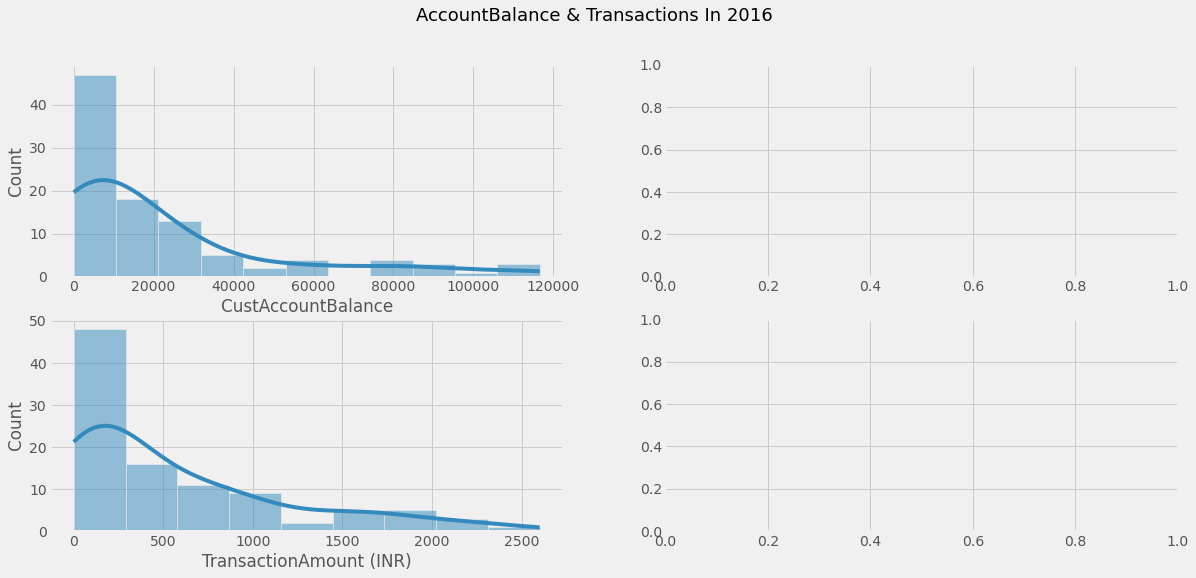

In [56]:
# Q2
fig, ax = plt.subplots(2, 2, figsize = (18,8))

# Set the main title of the figure
plt.suptitle('AccountBalance & Transactions In 2016', size = 18)

ax[0,0] = sns.histplot(df[0:100], x='CustAccountBalance', ax=ax[0,0], kde = True)
ax[1,0] = sns.histplot(df[0:100], x='TransactionAmount (INR)', ax=ax[1,0], kde = True)

# Show the figure
plt.show()

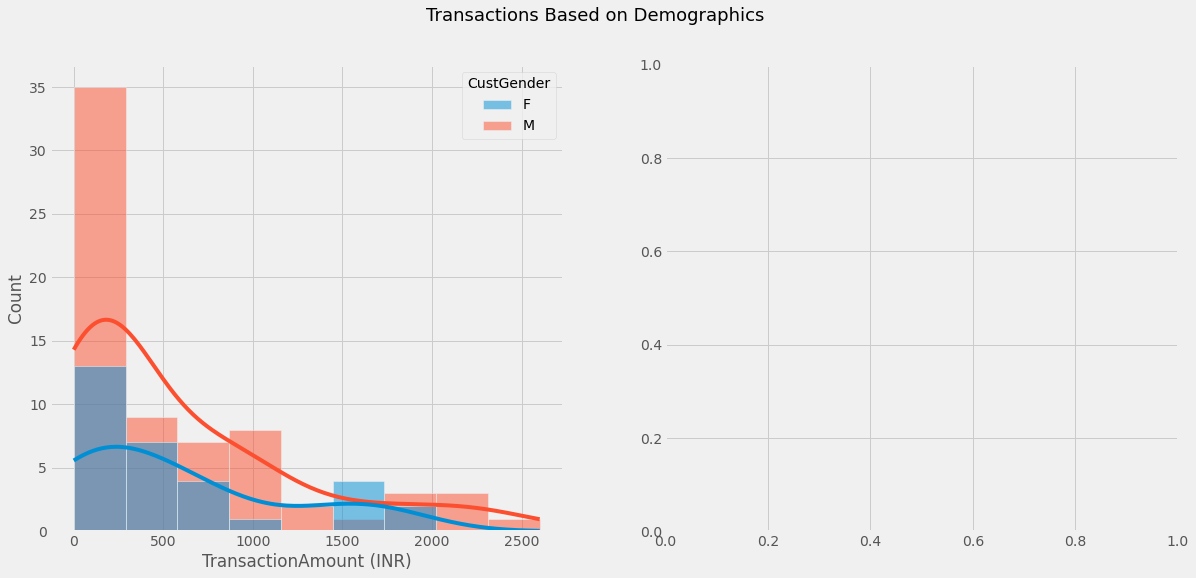

In [61]:
# Q3
fig, ax = plt.subplots(1,2, figsize = (18,8))

# Set the main title of the figure
plt.suptitle('Transactions Based on Demographics', size = 18)

ax[0] = sns.histplot(df[0:100], x='TransactionAmount (INR)', ax = ax[0],kde = True, hue ='CustGender')

# Show the figure
plt.show()

In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 811641 entries, 0 to 1044132
Data columns (total 9 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   TransactionID            811641 non-null  object 
 1   CustomerID               811641 non-null  object 
 2   CustGender               811641 non-null  object 
 3   CustLocation             811641 non-null  object 
 4   CustAccountBalance       811641 non-null  float64
 5   TransactionDate          811641 non-null  object 
 6   TransactionTime          811641 non-null  int64  
 7   TransactionAmount (INR)  811641 non-null  float64
 8   age                      811641 non-null  float64
dtypes: float64(3), int64(1), object(5)
memory usage: 61.9+ MB


In [87]:
#Data Preprocessing

In [37]:
df2 = df.copy()
from sklearn.preprocessing import StandardScaler

colnames = df2.columns 
num_columns = df2.select_dtypes(include=['float', 'int']).columns 
df2[num_columns] = StandardScaler().fit_transform(df2[num_columns])
X = df[['CustAccountBalance', 'TransactionAmount (INR)']]

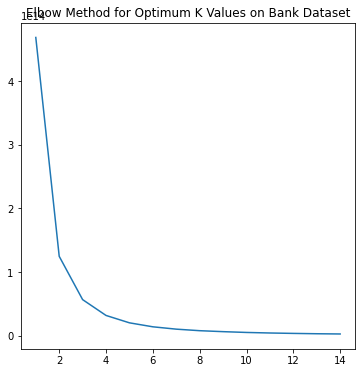

In [38]:
#ELBOW METHOD

from sklearn.cluster import KMeans
wcss = []

for i in range(1, 15):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
fig, ax = plt.subplots(figsize = (6,6))
    
plt.plot(range(1,15), wcss)

plt.title('Elbow Method for Optimum K Values on Bank Dataset')

plt.show()

In [ ]:
#from graph it can be seen optimum k is k = 3

In [39]:
#Using K means clustering for unsupervised learning 

kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state=42)
y_kmeans = kmeans.fit_predict(X)

X['cluster'] = y_kmeans
X1 = X[X['cluster'] == 0]
X2 = X[X['cluster'] == 1]
X3 = X[X['cluster'] == 2]

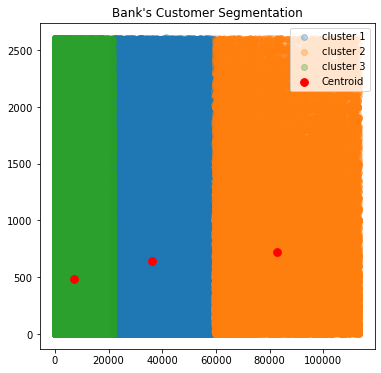

In [40]:
fig, ax = plt.subplots(figsize = (6,6))

plt.title("Bank's Customer Segmentation")

plt.scatter(X1.iloc[:,0], X1.iloc[:, 1], label = 'cluster 1', alpha = 0.3)
plt.scatter(X2.iloc[:,0], X2.iloc[:, 1], label = 'cluster 2', alpha = 0.3)
plt.scatter(X3.iloc[:,0], X3.iloc[:, 1], label = 'cluster 3', alpha = 0.3)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], color = 'red', 
           label = 'Centroid', s= 60)

plt.legend()
plt.show()

In [41]:
df['Cluster'] = X['cluster']

In [42]:
clust_count = df['Cluster'].value_counts()

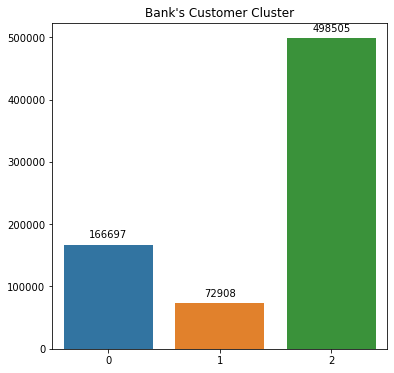

In [43]:
fig, ax = plt.subplots(figsize = (6,6))

plt.title("Bank's Customer Cluster")

ax = sns.barplot(x = clust_count.index, y = clust_count.values)

for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', 
                xytext = (0, 10), 
                textcoords = 'offset points')

plt.show()

In [44]:
clust1 = df[df['Cluster'] == 0]
clust2 = df[df['Cluster'] == 1]
clust3 = df[df['Cluster'] == 2]

Text(0.5, 1.0, 'Top 20 Cities')

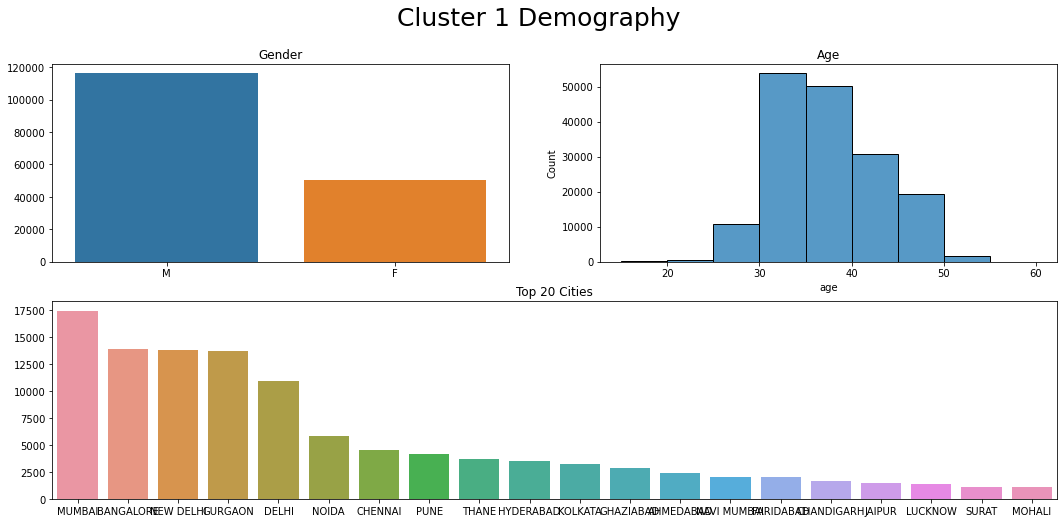

In [45]:
# identify cluster1
fig, ax = plt.subplots(2, 2, figsize = (18,8))
bins = [15, 20, 25, 30, 35, 40, 45, 50, 55, 60]

grid_shape = (2, 2)

plt.suptitle("Cluster 1 Demography", size = 25)

ax1 = plt.subplot2grid(grid_shape, (0, 0))
ax1 = sns.barplot(x=clust1['CustGender'].value_counts().index, y = clust1['CustGender'].value_counts().values)
ax1.set_title('Gender')

ax2 = plt.subplot2grid(grid_shape, (0, 1))
ax2 = sns.histplot(clust1['age'], bins = bins)
ax2.set_title('Age')

ax3 = plt.subplot2grid(grid_shape, (1, 0), colspan=2)
ax3 = sns.barplot(x=clust1['CustLocation'].value_counts()[0:20].index, y = clust1['CustLocation'].value_counts()[0:20].values)
ax3.set_title('Top 20 Cities')

In [46]:
for p in ax1.patches:
    ax1.annotate(format(p.get_height(), '.0f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', 
                xytext = (0, 10), 
                textcoords = 'offset points')
    
for p in ax2.patches:
    ax2.annotate(format(p.get_height(), '.0f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', 
                xytext = (0, 10), 
                textcoords = 'offset points')
    
for p in ax3.patches:
    ax3.annotate(format(p.get_height(), '.0f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', 
                xytext = (0, 10), 
                textcoords = 'offset points')

ax3.set_xticklabels(clust1['CustLocation'].value_counts()[0:20].index, rotation=90)

[Text(0, 0, 'MUMBAI'),
 Text(1, 0, 'BANGALORE'),
 Text(2, 0, 'NEW DELHI'),
 Text(3, 0, 'GURGAON'),
 Text(4, 0, 'DELHI'),
 Text(5, 0, 'NOIDA'),
 Text(6, 0, 'CHENNAI'),
 Text(7, 0, 'PUNE'),
 Text(8, 0, 'THANE'),
 Text(9, 0, 'HYDERABAD'),
 Text(10, 0, 'KOLKATA'),
 Text(11, 0, 'GHAZIABAD'),
 Text(12, 0, 'AHMEDABAD'),
 Text(13, 0, 'NAVI MUMBAI'),
 Text(14, 0, 'FARIDABAD'),
 Text(15, 0, 'CHANDIGARH'),
 Text(16, 0, 'JAIPUR'),
 Text(17, 0, 'LUCKNOW'),
 Text(18, 0, 'SURAT'),
 Text(19, 0, 'MOHALI')]

Text(0.5, 1.0, 'Top 20 Cities')

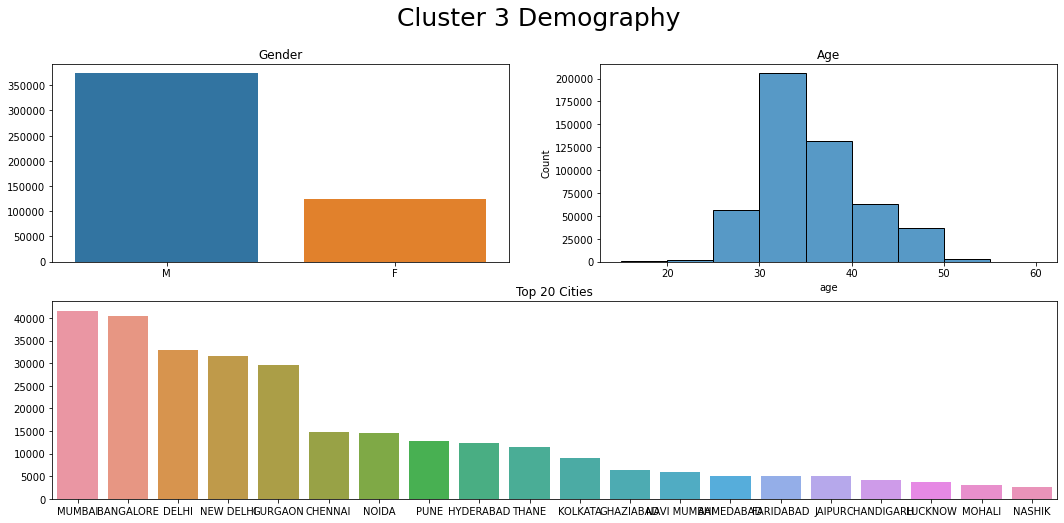

In [47]:
# identify cluster3
fig, ax = plt.subplots(2, 2, figsize = (18,8))
bins = [15, 20, 25, 30, 35, 40, 45, 50, 55, 60]

grid_shape = (2, 2)

plt.suptitle("Cluster 3 Demography", size = 25)

ax1 = plt.subplot2grid(grid_shape, (0, 0))
ax1 = sns.barplot(x=clust3['CustGender'].value_counts().index, y = clust3['CustGender'].value_counts().values)
ax1.set_title('Gender')

ax2 = plt.subplot2grid(grid_shape, (0, 1))
ax2 = sns.histplot(clust3['age'], bins = bins)
ax2.set_title('Age')

ax3 = plt.subplot2grid(grid_shape, (1, 0), colspan=2)
ax3 = sns.barplot(x=clust3['CustLocation'].value_counts()[0:20].index, y = clust3['CustLocation'].value_counts()[0:20].values)
ax3.set_title('Top 20 Cities')


In [48]:
# identify cluster3

for p in ax1.patches:
    ax1.annotate(format(p.get_height(), '.0f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', 
                xytext = (0, 10), 
                textcoords = 'offset points')
    
for p in ax2.patches:
    ax2.annotate(format(p.get_height(), '.0f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', 
                xytext = (0, 10), 
                textcoords = 'offset points')
    
for p in ax3.patches:
    ax3.annotate(format(p.get_height(), '.0f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', 
                xytext = (0, 10), 
                textcoords = 'offset points')

ax3.set_xticklabels(clust1['CustLocation'].value_counts()[0:20].index, rotation=90)

[Text(0, 0, 'MUMBAI'),
 Text(1, 0, 'BANGALORE'),
 Text(2, 0, 'NEW DELHI'),
 Text(3, 0, 'GURGAON'),
 Text(4, 0, 'DELHI'),
 Text(5, 0, 'NOIDA'),
 Text(6, 0, 'CHENNAI'),
 Text(7, 0, 'PUNE'),
 Text(8, 0, 'THANE'),
 Text(9, 0, 'HYDERABAD'),
 Text(10, 0, 'KOLKATA'),
 Text(11, 0, 'GHAZIABAD'),
 Text(12, 0, 'AHMEDABAD'),
 Text(13, 0, 'NAVI MUMBAI'),
 Text(14, 0, 'FARIDABAD'),
 Text(15, 0, 'CHANDIGARH'),
 Text(16, 0, 'JAIPUR'),
 Text(17, 0, 'LUCKNOW'),
 Text(18, 0, 'SURAT'),
 Text(19, 0, 'MOHALI')]

In [ ]:
# Bank X has 3 different group of customers. Which if clusterized into different group using resulting a customer group which has similar transaction amount, but has significant different from account balance as following :
# Cluster 1 = Low account balance
# Cluster 2 = Medium account balance
# Cluster 3 = high account balance
# Further analysis by demographics, there is not much differentiation from gender and location except by age group. Specifically on Young cusomters (20 - 25 year old). Where :
# Cluster 1 = Has a moderate number of young customer compared to cluster 1 & cluster 3
# Cluster 2 = Has a lowest number of young customer compared to cluster 1 & cluster 3
# Cluster 3 = Has a highest number of young customer compared to cluster 1 & cluster 3